In [96]:
# celex_determine_predictors.ipynb
# H. Muller
# 2023-04-01

# Input: celex components and cgn
# Output: compounds in cgn with information about relative frequency, paradigmatic probability, segmental information etc.

In [97]:
from os import environ

# Parse arguments
if environ.get('lemma'):
    lemmaPath = environ.get('lemma')
else:
    lemmaPath = '../DataProcessed/dml.txt'
    
if environ.get('word'):
    wordPath = environ.get('word')
else:
    wordPath = '../DataProcessed/dmw.txt'  
    
if environ.get('phono'):
    phonoPath = environ.get('phono')
else:
    phonoPath = '../DataProcessed/dpw.txt' 

if environ.get('subtlex'):
    subtlexPath = environ.get('subtlex')
else:
    subtlexPath = '../DataRaw/SUBTLEX-NL.txt' 
    
if environ.get('cgn'):
    cgnPath = environ.get('cgn')
else:
    cgnPath = '../DataProcessed/cgn_durations_comp-o.csv' 

if environ.get('outfile'):
    outfile = environ.get('outfile')
else:
    outfile = '../DataProcessed/cgn_predictors_comp-o.csv'

In [98]:
import pandas as pd

# Read files
lemma = pd.read_csv(lemmaPath, sep='\t', header=0, index_col=0)
word = pd.read_csv(wordPath, sep='\t', header=0, index_col=0)
phono = pd.read_csv(phonoPath, sep='\t', header=0, index_col=0)
subtlex = pd.read_csv(subtlexPath, sep='\t', header=0)
cgn = pd.read_csv(cgnPath, sep='\t', header=0, index_col=0)

# Determine compounds

In [99]:
lemma.head()

,IdNumLemma,Head,Inl,MorphStatus,MorphCnt,DerComp,Comp,Def,Imm,ImmSubCat,ImmAllo,ImmSubst,StrucLab,StrucAllo,StrucSubst,Sepa
0,1,a,1986,M,1,Y,Y,Y,a,N,N,N,(a)[N],N,N,N
1,2,a,1104,M,1,Y,Y,Y,a,P,N,N,(a)[P],N,N,N
2,3,Aafje,41,I,0,Y,Y,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
3,4,Aafke,4,I,0,Y,Y,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
4,5,Aagje,9,I,0,Y,Y,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N


In [100]:
# remove rows with NaN in StrucLab
#lemma = lemma[lemma['StrucLab'].notna()]

# add StrucLab to forms
#word = word.merge(lemma[['IdNumLemma', 'StrucLab', 'Imm', 'ImmSubCat']], on='IdNumLemma', how='left')

#word.head()

In [101]:
# Regex patterns: pattern 1 = simplex+interfix+simplex; pattern2 = complex/simplex+interfix+complex/simplex
#pattern2 = r'.*\[[A-Za-z]+\|[A-Za-z]+\.[A-Za-z]+\].*'

# Select rows where the "StrucLab" column matches the pattern
#compounds3moreMorph = lemma[lemma['StrucLab'].str.match(pattern2)]

# get ID of lemmas that are compounds: simplex/complex+interfix+simplex/complex
#compounds3moreMorphID = compounds3moreMorph.IdNumLemma.drop_duplicates().to_list()

# get compounds
#compounds = word.loc[word.IdNumLemma.isin(compounds3moreMorphID), ]

In [102]:
# add StrucLab to forms
lemma = lemma.fillna('')
word = word.fillna('')

word = word.merge(lemma[['IdNumLemma', 'StrucLab', 'Imm', 'ImmSubCat']], on='IdNumLemma', how='left')
word = word[word['ImmSubCat']!='']

word.head()

,IdNum,Word,Inl,IdNumLemma,FlectType,StrucLab,Imm,ImmSubCat
0,1,a,1962,1,e,(a)[N],a,N
1,2,a,1104,2,X,(a)[P],a,P
5,6,aagt,0,6,e,(aagt)[N],aagt,N
6,7,aagtappel,0,7,e,"((aagt)[N],(appel)[N])[N]",aagt+appel,NN
7,8,aagtappelen,0,7,m,"((aagt)[N],(appel)[N])[N]",aagt+appel,NN


In [103]:
# Motoki provided a list with compounds with missing predictiors. These compounds were excluded because they have a frequency of 0
stimuli = list(set(cgn.WordOrtho))
words = word.loc[word.Word.isin(stimuli),]
words = words[words.Inl==0]
wordsList = list(set(words.Word))

motoki = ['kersenpluk', 'prullenbakken', 'tabakspotten', 'tabakspotten', 'kousenvoeten', 'bedrijfsanalyse', 'gevechtslinie', 'lamskotelet', 'plantenkalender', 'overwinningslied', 'openingsbeeld', 'vlooienband', 'vlooienband', 'lorrenboer', 'knopendoos', 'zonnecollector', 'vrouwenboekhandels', 'vrouwentijdschriften', 'vrouwenliteratuur', 'vrouwenliteratuur', 'vrouwenvolk', 'boekenverzameling', 'kousenvoeten', 'verzekeringsdeskundige', 'sportfondsenbad', 'gevechtslinie', 'vlaggendoek', 'manslengte', 'huisartsengeneeskunde', 'karmelietessenklooster', 'varkensleder', 'wespentaille', 'wespentaille', 'bootshaak', 'bootshaak', 'bootshaak', 'bootshaak', 'tijdsafstanden', 'driepuntsgordel', 'temperatuurswisseling', 'aanhalingsteken', 'kousenvoeten', 'verwarmingselementen', 'regeringscolleges', 'pillendoosje', 'pillendoosje', 'zedenpreken', 'duivelskop', 'nomadenstam', 'fluitenkruid', 'stoppenkast', 'verzorgingshuizen', 'lijkenhuizen', 'bollenschuur', 'nomadenstam', 'pottenbakkerswiel', 'klassenstelsel', 'faculteitsvergaderingen', 'hengstenbal', 'konijnenberg', 'verkiezingslijst', 'ontvoogdingsproces', 'ontvoogdingsproces', 'onderzoeksactiviteit', 'onderzoeksmethodes', 'onderzoeksmethodes', 'bondscoach', 'arendsjong', 'levensbenodigdheden', 'veiligheidsbril', 'voddenboeren', 'manslengte', 'koningsmoord', 'adelaarsvarens', 'adelaarsvarens', 'vliegengordijn', 'fluitenkruid', 'fluitenkruid', 'verwarmingselementen', 'blindenschrift', 'vingertoppengevoel', 'ontkoppelingspedaal', 'varkensdarmen', 'karnemelkspap', 'herenfietsen', 'gebedsruimte', 'kousenvoeten', 'bruidsmystiek', 'platencontract', 'vossegat']

[item for item in motoki if item not in wordsList]

[]

In [104]:
# get compounds
# compounds = word.loc[word.ImmSubCat.str.contains('[1-9A-Z]x[1-9A-Z]'), ].copy()
# compounds.head()
compounds = word.loc[word.StrucLab.str.contains('[1-9A-Z]\|[1-9A-Z]+\.[1-9A-Z]+', regex=True), ].copy()
compounds.head()

,IdNum,Word,Inl,IdNumLemma,FlectType,StrucLab,Imm,ImmSubCat
33,34,aalbessengelei,7,19,e,"(((aal)[N],(bes)[N])[N],(en)[N|N.N],(gelei)[N]...",aalbes+en+gelei,NxN
34,35,aalbessenjam,0,20,e,"(((aal)[N],(bes)[N])[N],(en)[N|N.N],(jam)[N])[N]",aalbes+en+jam,NxN
35,36,aalbessenjenever,0,21,e,"(((aal)[N],(bes)[N])[N],(en)[N|N.N],(jenever)[...",aalbes+en+jenever,NxN
36,37,aalbessesap,0,22,e,"(((aal)[N],(bes)[N])[N],(e)[N|N.N],(sap)[N])[N]",aalbes+e+sap,NxN
37,38,aalbessestruik,2,23,e,"(((aal)[N],(bes)[N])[N],(e)[N|N.N],(struik)[N]...",aalbes+e+struik,NxN


In [105]:
# some compounds are not analyzed correctly ...
mask1 = compounds.ImmSubCat.str.len()==1
mask2 = ((compounds.ImmSubCat.str.len()==2) & (compounds.ImmSubCat.str.contains("x")))
display(compounds.loc[mask1,].head())
display(compounds.loc[mask2,].head())

# ...  and can be removed
compounds = compounds.loc[~mask1,]
compounds = compounds.loc[~mask2,]

,IdNum,Word,Inl,IdNumLemma,FlectType,StrucLab,Imm,ImmSubCat
145544,145561,kandidaats,15,47078,e,"((((kandideer)[V],(aat)[N|V.])[N],(s)[N|N.N],(...",kandidaatsexamen,N
269427,269444,scheids,0,89483,e,"(((scheid)[V],(s)[N|V.N],((recht)[V],(er)[N|V....",scheidsrechter,N
269428,269445,scheidsen,0,89483,m,"(((scheid)[V],(s)[N|V.N],((recht)[V],(er)[N|V....",scheidsrechter,N


,IdNum,Word,Inl,IdNumLemma,FlectType,StrucLab,Imm,ImmSubCat
5819,5820,aardrijkskundig,17,1214,P,"((((aarde)[N],(rijk)[N])[N],(s)[N|N.N],(kunde)...",aardrijkskunde+ig,Nx
5820,5821,aardrijkskundige,13,1214,PE,"((((aarde)[N],(rijk)[N])[N],(s)[N|N.N],(kunde)...",aardrijkskunde+ig,Nx
5844,5845,aardsgezindheid,2,1226,e,"(((aarde)[N],(s)[A|N.A],(gezind)[A])[A],(heid)...",aardsgezind+heid,Ax
6933,6934,achtenswaardigheid,12,1652,e,"(((acht)[V],(s)[A|V.A],((waarde)[N],(ig)[A|N.]...",achtenswaardig+heid,Ax
7941,7942,achtingswaardig,0,1935,P,"((((acht)[V],(ing)[N|V.])[N],(s)[A|N.A],(waard...",achtingswaard+ig,Ax


In [106]:
list(set(compounds.ImmSubCat))

['3N',
 '1x1',
 '1x3',
 'NNx',
 'AxN3x',
 '2xA',
 'BxNx',
 '2N',
 'AxN1x',
 'AxNx2x',
 'PxNx',
 'NxNx',
 'Ax1',
 'Nx6x',
 'NxN',
 'BxN',
 'NxQ',
 'OxN',
 'NN',
 'NxAx',
 '6xA',
 'Nx2',
 'Nx1',
 'NNNxN',
 'ExN',
 'PN',
 'AxNx7x',
 '3xA',
 'Ax2x',
 '1xN',
 'QN',
 'BN',
 'NxB',
 '3xP',
 'AxNx3x',
 'PNxN',
 'N3x',
 'QxNx',
 'AN',
 'BNxN',
 '3xN',
 'Nx1x',
 'PxN',
 'AxNN',
 'NxNN',
 'NxA',
 'Nx2x',
 '1N',
 'Nx7',
 'NxAxN',
 'Nx2N',
 'Nx3',
 '7xN',
 'ANxN',
 'NxNxN',
 'N2x',
 'AxNxN',
 'AxP',
 '2xN',
 'AxNx',
 'Nx3x',
 'Nx7x',
 'AxN',
 'Nxx',
 'NNxN',
 'N3',
 'Nx3N',
 '7xA',
 'QNxN']

In [108]:
compounds.loc[compounds.ImmSubCat.str.contains("x")==False,].head(50)

,IdNum,Word,Inl,IdNumLemma,FlectType,StrucLab,Imm,ImmSubCat
5817,5818,aardrijkskundeboek,5,1213,e,"((((aarde)[N],(rijk)[N])[N],(s)[N|N.N],(kunde)...",aardrijkskunde+boek,NN
5818,5819,aardrijkskundeboeken,0,1213,m,"((((aarde)[N],(rijk)[N])[N],(s)[N|N.N],(kunde)...",aardrijkskunde+boek,NN
21771,21772,arbeidsmarktbeleid,27,5832,e,"(((arbeid)[N],(s)[N|N.N],(markt)[N])[N],(belei...",arbeidsmarkt+beleid,NN
21772,21773,arbeidsmarktparticipatie,6,5833,e,"(((arbeid)[N],(s)[N|N.N],(markt)[N])[N],((part...",arbeidsmarkt+participatie,NN
21773,21774,arbeidsmarktpartij,0,5834,e,"(((arbeid)[N],(s)[N|N.N],(markt)[N])[N],(parti...",arbeidsmarkt+partij,NN
21774,21775,arbeidsmarktpartijen,2,5834,m,"(((arbeid)[N],(s)[N|N.N],(markt)[N])[N],(parti...",arbeidsmarkt+partij,NN
21775,21776,arbeidsmarktpositie,111,5835,e,"(((arbeid)[N],(s)[N|N.N],(markt)[N])[N],(((pos...",arbeidsmarkt+positie,NN
22882,22899,aspirant-bestuursambtenaar,0,6386,e,"(((aspireer)[V],(ant)[N|V.])[N],((bestuur)[N],...",aspirant+bestuursambtenaar,NN
22883,22900,aspirant-bestuursambtenaren,0,6386,m,"(((aspireer)[V],(ant)[N|V.])[N],((bestuur)[N],...",aspirant+bestuursambtenaar,NN
28742,28759,bedrijfstakniveau,6,8803,e,"(((bedrijf)[N],(s)[N|N.N],(tak)[N])[N],(niveau...",bedrijfstak+niveau,NN


In [109]:
# determine interfix index
# note that some words are not analyzed correctly, e.g. arbeidstijdverkorting, which will be removed below
compounds['IfixIndex'] = compounds['ImmSubCat'].str.find('x')
compounds.loc[compounds.ImmSubCat.str.contains("x")==False, ].head()

,IdNum,Word,Inl,IdNumLemma,FlectType,StrucLab,Imm,ImmSubCat,IfixIndex
5817,5818,aardrijkskundeboek,5,1213,e,"((((aarde)[N],(rijk)[N])[N],(s)[N|N.N],(kunde)...",aardrijkskunde+boek,NN,-1
5818,5819,aardrijkskundeboeken,0,1213,m,"((((aarde)[N],(rijk)[N])[N],(s)[N|N.N],(kunde)...",aardrijkskunde+boek,NN,-1
21771,21772,arbeidsmarktbeleid,27,5832,e,"(((arbeid)[N],(s)[N|N.N],(markt)[N])[N],(belei...",arbeidsmarkt+beleid,NN,-1
21772,21773,arbeidsmarktparticipatie,6,5833,e,"(((arbeid)[N],(s)[N|N.N],(markt)[N])[N],((part...",arbeidsmarkt+participatie,NN,-1
21773,21774,arbeidsmarktpartij,0,5834,e,"(((arbeid)[N],(s)[N|N.N],(markt)[N])[N],(parti...",arbeidsmarkt+partij,NN,-1


In [112]:
# get morphological constituents and interfix position
compoundsIfix = compounds.loc[compounds.ImmSubCat.str.contains("x")==False, ]
splitMorphs = compoundsIfix['Imm'].str.split('+',expand=True)
splitMorphs['IfixIndex'] = compoundsIfix['ImmSubCat'].str.find('x')
splitMorphs = splitMorphs.fillna('')

In [113]:
# define a function to create the new columns based on the morphemes of the constituents
def get_ortho(row):
    if row['IfixIndex'] == 3:
        leftOrtho = row[0] + row[1] + row[2]
        Interfix = row[3]
        rightOrtho = row[4]
    elif row['IfixIndex'] == 2:
        leftOrtho = row[0] + row[1]
        Interfix = row[2]
        rightOrtho = row[3]+ row[4]
    else:
        leftOrtho = row[0]
        Interfix = row[1]
        rightOrtho = row[2]+ row[3] + row[4]
    return pd.Series([leftOrtho, Interfix, rightOrtho])

# apply the function to each row of the dataframe to determine constituents
compoundsIfix[['Left', 'Ifix', 'Right']] = splitMorphs.apply(get_ortho, axis=1)
compoundsIfix.loc[compoundsIfix.IfixIndex>1, ].head()

KeyError: 2

In [85]:
# remove wrong rows
print(len(compounds))
compounds = compounds.loc[compounds.Right!="",]
print(len(compounds))

25197
24874


In [86]:
# note that the orthography of the left and righ constituent sometimes is not correct
mask1 = compounds.apply(lambda row: row['Word'].startswith(row['Left'])==False, axis=1)
mask2 = compounds.apply(lambda row: row['Word'].endswith(row['Right'])==False, axis=1)
mask = mask1 & mask2
compounds.loc[mask,].head()

,IdNum,Word,Inl,IdNumLemma,FlectType,StrucLab,Imm,ImmSubCat,IfixIndex,Left,Ifix,Right
269,270,aanbevelenswaarde,0,92,PE,"(((aan)[P],(beveel)[V])[V],(s)[A|V.A],(waard)[...",aanbeveel+s+waard,2xA,1,aanbeveel,s,waard
270,271,aanbevelenswaarder,0,92,C,"(((aan)[P],(beveel)[V])[V],(s)[A|V.A],(waard)[...",aanbeveel+s+waard,2xA,1,aanbeveel,s,waard
271,272,aanbevelenswaardere,0,92,CE,"(((aan)[P],(beveel)[V])[V],(s)[A|V.A],(waard)[...",aanbeveel+s+waard,2xA,1,aanbeveel,s,waard
273,274,aanbevelenswaardige,11,93,PE,"(((aan)[P],(beveel)[V])[V],(s)[A|V.A],((waarde...",aanbeveel+s+waardig,2xA,1,aanbeveel,s,waardig
274,275,aanbevelenswaardiger,0,93,C,"(((aan)[P],(beveel)[V])[V],(s)[A|V.A],((waarde...",aanbeveel+s+waardig,2xA,1,aanbeveel,s,waardig


In [94]:
compounds.loc[compounds.Word=="aalbes",]

,IdNum,Word,Inl,IdNumLemma,FlectType,StrucLab,Imm,ImmSubCat,IfixIndex,Left,...,SubtlexAbsFreq,LeftIfix,SameLeftAndIfixFQ,SameLeftFQ,SameLeftDiffIfixFQ,RelFreq,SameLeftAndIfix,SameLeft,SameLeftDiffIfix,IfixNum


# Frequency based predictors

In [88]:
# replace CELEX frequency with subtlex frequency
subtlex = subtlex.rename(columns={'FREQcount':'SubtlexAbsFreq'})
compounds = compounds.merge(subtlex[['Word', 'SubtlexAbsFreq']], on='Word', how='left')

In [89]:
# remove words with frequency smaller than 0
compounds = compounds.loc[compounds.SubtlexAbsFreq>0,].copy()
compounds = compounds.drop_duplicates('Word')

In [90]:
# Add summed frequency of compounds with same left constituent and interfix
compounds['LeftIfix'] = compounds['Left'] + compounds['Ifix']
compounds['SameLeftAndIfixFQ'] = compounds['SubtlexAbsFreq'].groupby(compounds['LeftIfix']).transform('sum').fillna(0)

# Add summed freqency of compounds with same left constituent
compounds['SameLeftFQ'] = compounds['SubtlexAbsFreq'].groupby(compounds['Left']).transform('sum').fillna(0)

# Add summed freqency of compounds with same left constituent but different interfix
compounds['SameLeftDiffIfixFQ'] = compounds['SameLeftFQ'] - compounds['SameLeftAndIfixFQ']

# compute relative frequency
compounds['RelFreq'] = compounds['SameLeftAndIfixFQ'] / compounds['SameLeftFQ']

# Type based predictors

In [91]:
# Add number compounds with same left constituent and interfix
compounds['SameLeftAndIfix'] = compounds['SubtlexAbsFreq'].groupby(compounds['LeftIfix']).transform('count').fillna(0)

# Add number of compounds with same left constituent
compounds['SameLeft'] = compounds['SubtlexAbsFreq'].groupby(compounds['Left']).transform('count').fillna(0)

# Add number of compounds with same left constituent but different interfix
compounds['SameLeftDiffIfix'] = compounds['SameLeft'] - compounds['SameLeftAndIfix']

In [92]:
# number of interfixes the left constituent can combine with
compounds['IfixNum'] = compounds.groupby('Left')['Ifix'].transform('nunique')

# Paradigmatic probability, entropy, and segmental information

In [170]:
compounds['ParaProbType'] = compounds['SameLeftAndIfix'] / compounds['SameLeft']

<Axes: >

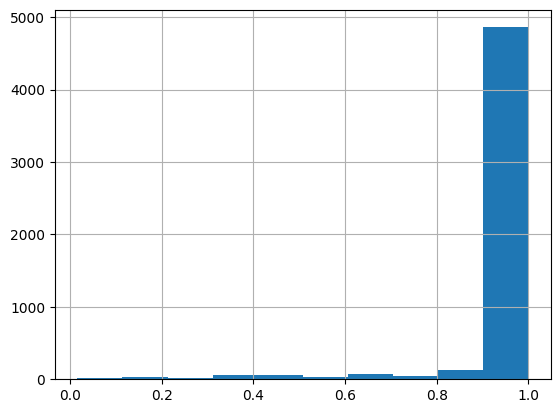

In [171]:
import matplotlib

compounds.ParaProbType.hist()

<Axes: >

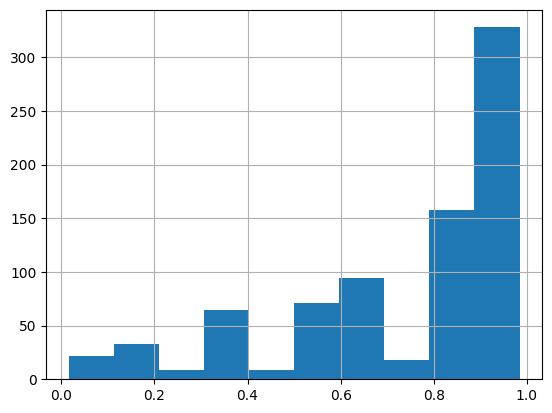

In [172]:
compounds.loc[compounds.ParaProbType<1, 'ParaProbType'].hist()

Note that `ParaProbToke` is the same as `RelFreq`

<Axes: >

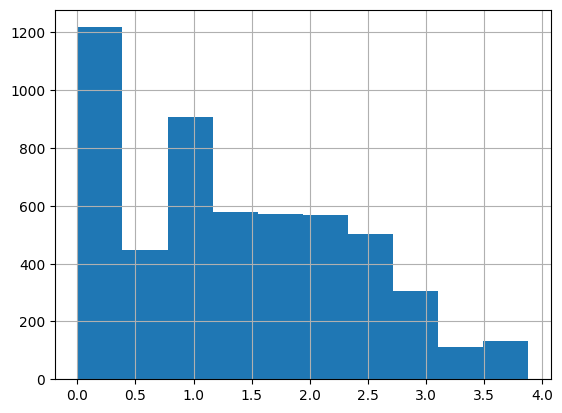

In [173]:
import numpy as np

# compute right positional entropy
compounds['CumFreq'] = compounds.groupby(['Right', 'Ifix'])['SubtlexAbsFreq'].transform('sum')
compounds['RelFreq'] = compounds['SubtlexAbsFreq'] / compounds['CumFreq']
compounds['prob'] = compounds['RelFreq'] * np.log2(compounds['RelFreq'])
compounds['RightPositionalEntropy'] = -1 * compounds.groupby(['Right', 'Ifix'])['prob'].transform('sum')
compounds.RightPositionalEntropy.hist()

# Merge all and write to file

In [174]:
compounds.head()

,IdNum,Word,Inl,IdNumLemma,FlectType,StrucLab,Imm,ImmSubCat,IfixIndex,Left,...,SameLeftDiffIfixFQ,RelFreq,SameLeftAndIfix,SameLeft,SameLeftDiffIfix,IfixNum,ParaProbType,CumFreq,prob,RightPositionalEntropy
35,283,aanbevelingsbrief,14,95,e,"((((aan)[P],(beveel)[V])[V],(ing)[N|V.])[N],(s...",aanbeveling+s+brief,NxN,1,aanbeveling,...,0.0,0.153191,2,2,0,1,1.0,235.0,-0.414627,2.649707
36,284,aanbevelingsbrieven,8,95,m,"((((aan)[P],(beveel)[V])[V],(ing)[N|V.])[N],(s...",aanbeveling+s+brief,NxN,1,aanbeveling,...,0.0,0.042553,2,2,0,1,1.0,235.0,-0.193812,2.649707
56,589,aandeelhoudersvergadering,17,159,e,"((((aan)[P],(deel)[N])[N],(houd)[V],(er)[N|NV....",aandeelhouder+s+vergadering,NxN,1,aandeelhouder,...,0.0,0.145455,1,1,0,1,1.0,55.0,-0.404561,2.720362
58,592,aandelenkapitaal,25,160,e,"(((aan)[P],(deel)[N])[N],(en)[N|N.N],(kapitaal...",aandeel+en+kapitaal,NxN,1,aandeel,...,0.0,1.000000,3,3,0,1,1.0,1.0,0.000000,-0.000000
61,595,aandelenopties,0,161,m,"(((aan)[P],(deel)[N])[N],(en)[N|N.N],(optie)[N...",aandeel+en+optie,NxN,1,aandeel,...,0.0,1.000000,3,3,0,1,1.0,4.0,0.000000,-0.000000


In [175]:
compounds.columns

Index(['IdNum', 'Word', 'Inl', 'IdNumLemma', 'FlectType', 'StrucLab', 'Imm',
       'ImmSubCat', 'IfixIndex', 'Left', 'Ifix', 'Right', 'SubtlexAbsFreq',
       'LeftIfix', 'SameLeftAndIfixFQ', 'SameLeftFQ', 'SameLeftDiffIfixFQ',
       'RelFreq', 'SameLeftAndIfix', 'SameLeft', 'SameLeftDiffIfix', 'IfixNum',
       'ParaProbType', 'CumFreq', 'prob', 'RightPositionalEntropy'],
      dtype='object')

In [176]:
dfFinal = compounds[['Word', 'SubtlexAbsFreq', 'SameLeftAndIfixFQ', 'SameLeftFQ', 'SameLeftDiffIfixFQ', 'RelFreq', 'SameLeftAndIfix', 
                     'SameLeft', 'SameLeftDiffIfix', 'IfixNum', 'ParaProbType', 'RightPositionalEntropy']].drop_duplicates()
dfFinal = dfFinal.rename(columns={'Word':'WordOrtho'})

In [177]:
cgn.columns

Index(['FileNameTierName', 'ID', 'WordOrtho', 'WordPhono', 'Phone',
       'PhoneStart', 'PhoneEnd', 'variant', 'UtteranceBorder',
       'UtteranceStart', 'UtteranceEnd', 'UtteranceDuration', 'WordOrthoLow',
       'WordSylNum', 'SegCV', 'WordCV', 'UtteranceID', 'UttSylNum',
       'SpeechRate', 'leftOrtho', 'Interfix', 'rightOrtho', 'IfixPhono',
       'leftPhono', 'rightPhono', 'wordPhonoCELEX', 'leftPhonoCELEX',
       'IfixPhonoCELEX', 'rightPhonoCELEX', 'WordStart', 'WordEnd',
       'leftPhonoLen', 'rightPhonoLen', 'IfixLen', 'PhoneDuration',
       'WordDuration', 'LeftDuration', 'RightDuration', 'IfixDuration'],
      dtype='object')

In [178]:
cgnFinal = cgn[['variant', 'WordOrtho', 'WordPhono', 'WordDuration', 'leftOrtho', 'Interfix', 'rightOrtho', 
                'leftPhonoCELEX', 'IfixPhonoCELEX', 'rightPhonoCELEX', 
                'leftPhono', 'IfixPhono', 'rightPhono', 'LeftDuration', 'RightDuration', 'IfixDuration', 'SpeechRate',]].drop_duplicates()
#cgnFinal = cgnFinal.rename(columns={'SubtlexAbsFreq':'Freq'})
print(len(cgnFinal))
cgnFinal = cgnFinal.merge(dfFinal, on='WordOrtho', how='left')
print(len(cgnFinal))

1846
1846


In [179]:
cgnFinal.head()

,variant,WordOrtho,WordPhono,WordDuration,leftOrtho,Interfix,rightOrtho,leftPhonoCELEX,IfixPhonoCELEX,rightPhonoCELEX,...,SameLeftAndIfixFQ,SameLeftFQ,SameLeftDiffIfixFQ,RelFreq,SameLeftAndIfix,SameLeft,SameLeftDiffIfix,IfixNum,ParaProbType,RightPositionalEntropy
0,Netherlandic,apekool,ap@kol,0.598,aap,e,kool,ap,@,kol,...,52.0,61.0,9.0,1.000000,9.0,11.0,2.0,2.0,0.818182,-0.000000
1,Netherlandic,vrouwenstem,vrA+w@stEm,0.863,vrouw,en,stem,vrMw,@,stEm,...,309.0,311.0,2.0,0.428571,63.0,64.0,1.0,2.0,0.984375,1.295836
2,Netherlandic,levenslustige,lev@slYst@G@,0.764,leven,s,lustige,lev@,s,l}st@G@,...,2639.0,2639.0,0.0,0.129032,119.0,119.0,0.0,1.0,1.000000,0.753828
3,Netherlandic,zonnegod,zOn@GOt,0.509,zon,e,god,zOn,@,GOt,...,913.0,2052.0,1139.0,1.000000,53.0,60.0,7.0,2.0,0.883333,-0.000000
4,Netherlandic,zonnekind,zOn@kInt,0.558,zon,e,kind,zOn,@,kInt,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [180]:
cgnFinal.columns

Index(['variant', 'WordOrtho', 'WordPhono', 'WordDuration', 'leftOrtho',
       'Interfix', 'rightOrtho', 'leftPhonoCELEX', 'IfixPhonoCELEX',
       'rightPhonoCELEX', 'leftPhono', 'IfixPhono', 'rightPhono',
       'LeftDuration', 'RightDuration', 'IfixDuration', 'SpeechRate',
       'SubtlexAbsFreq', 'SameLeftAndIfixFQ', 'SameLeftFQ',
       'SameLeftDiffIfixFQ', 'RelFreq', 'SameLeftAndIfix', 'SameLeft',
       'SameLeftDiffIfix', 'IfixNum', 'ParaProbType',
       'RightPositionalEntropy'],
      dtype='object')

In [181]:
#cgnFinal = cgnFinal[cgnFinal['SubtlexAbsFreq'].notna()]
#cgnFinal = cgnFinal[cgnFinal['RelFreq'].notna()]
#cgnFinal = cgnFinal[cgnFinal['ParaProbType'].notna()]
#cgnFinal = cgnFinal[cgnFinal['RightPositionalEntropy'].notna()]

In [182]:
cgnFinal['Interfix'].value_counts()

Interfix
s     1018
en     740
e       88
Name: count, dtype: int64

In [184]:
cgnFinal.fillna('')
cgnFinal.to_csv(outfile, sep='\t')
print(f'cgn written to {outfile}')

cgn written to ../DataProcessed/cgn_predictors_comp-o.csv


/vol/tensusers2/hmueller/WORKSTATION/VENV/lib/python3.10/site-packages/pandas/core/internals/blocks.py:2538: RuntimeWarning: invalid value encountered in cast
  values = values.astype(str)
